# 🎵 Regressão Linear com Spotify Tracks Dataset

Este projeto demonstra a aplicação de **regressão linear** utilizando o dataset público [Spotify Tracks DB (Kaggle)](https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db?resource=download).  
O objetivo é analisar a relação entre características musicais e entender como uma variável influencia outra.


---

## 📌 1. Importação de bibliotecas


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns



## 📌 2 Carregando Dataset

In [6]:
# Carregar dataset
df = pd.read_csv("SpotifyFeatures.csv")
df.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.0,C#,0.346,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.0,F#,0.151,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.0,C,0.103,-13.879,Minor,0.0362,99.488,5/4,0.368


## 📌 3 Matriz de Correlação

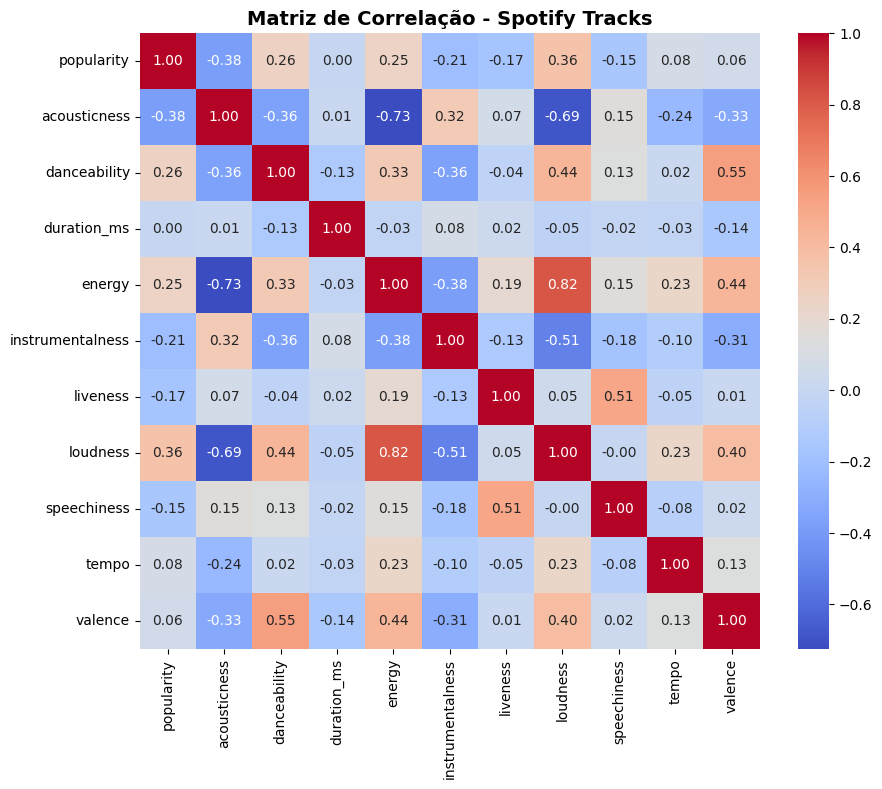

In [7]:
# Selecionar apenas colunas numéricas do dataset
numeric_df = df.select_dtypes(include="number")
numeric_df.corr()

# Calcula a  correlação
corr = numeric_df.corr()
# Plotando matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlação - Spotify Tracks", fontsize=14, fontweight="bold")
plt.show()

A matriz de correlação mostra a relação entre as variáveis quantitativas do dataset.  
Cada valor varia de -1 a 1:

- **+1**: correlação positiva perfeita (quando uma variável aumenta, a outra também sempre aumenta).  
- **-1**: correlação negativa perfeita (quando uma aumenta, a outra sempre diminui).  
- **0**: ausência de relação linear.  

No exemplo, observa-se uma correlação moderada (~0.82) entre o número de **loudness** e o número de **energy**, o que sugere que músicas mais altas tendem a ter maior intensidade.  


## 📌 4 Regressão Linear Simples: Loudness vs Energy
Foi selecionada Loudness (dB) como variável independente e Energy como dependente para aplicar regressão linear.

R²: 0.6654395518519087


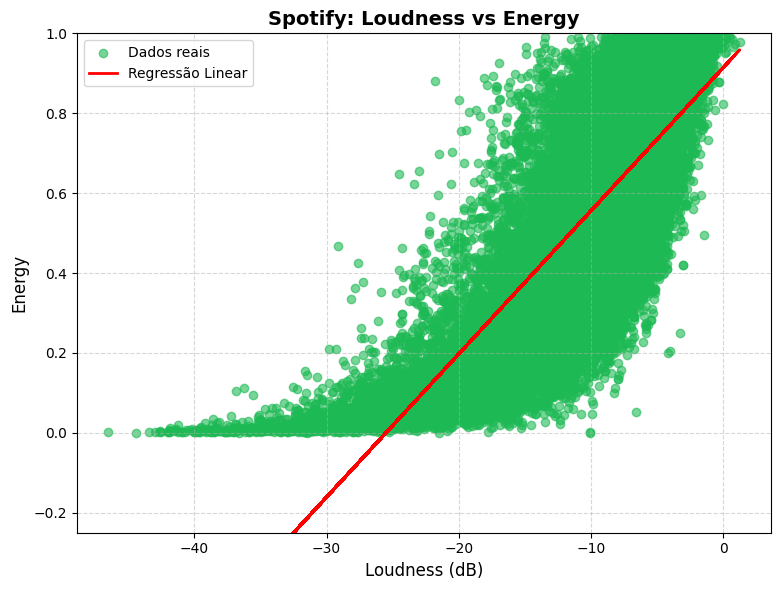

In [8]:
# Selecionando variáveis
X = df[["loudness"]]
y = df["energy"]

# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regressão linear usando o sklearn
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação
print("R²:", r2_score(y_test, y_pred))

# Visualização
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color="#1DB954", alpha=0.6, label="Dados reais")  # pontos reais
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regressão Linear")   # linha do modelo
plt.xlabel("Loudness (dB)", fontsize=12)
plt.ylabel("Energy", fontsize=12)
plt.title("Spotify: Loudness vs Energy", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.ylim(-0.25, 1)
plt.show()

O modelo de regressão entre **loudness** e **energy** apresentou **R² ≈ 0.69**, indicando que aproximadamente **69% da variação da energia das músicas** é explicada pelo volume (*loudness*).  
Isso evidencia uma relação clara: **músicas mais altas tendem a ser mais energéticas**.
